# Data Preprocessing and EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv(r"C:\Users\Sahan Ganguly\OneDrive\Desktop\Credit Risk Modeling\german_credit_data.csv")

In [4]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [5]:
df.info() # Displaying the structure of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
#filling the null values
df['Saving accounts'].fillna('No savings details', inplace=True)
df['Checking account'].fillna('No Available Information', inplace=True)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


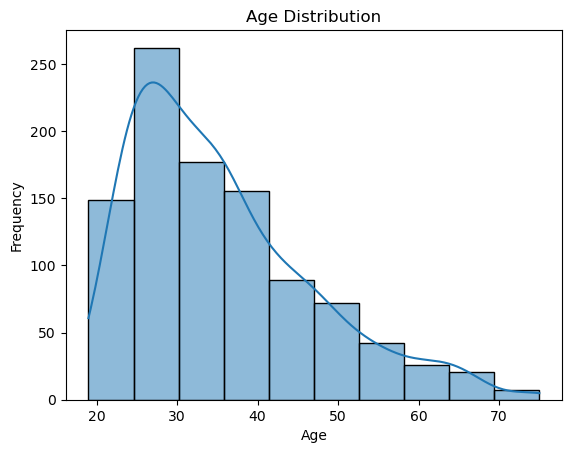

In [7]:
sns.histplot(df['Age'], kde= True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


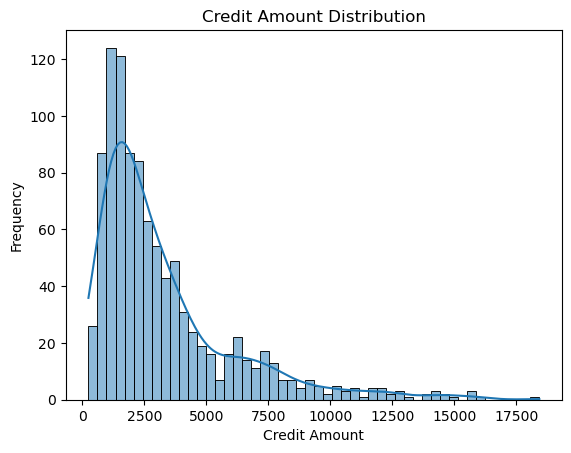

In [8]:
sns.histplot(df['Credit amount'], kde=True, bins=50)
plt.title('Credit Amount Distribution')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

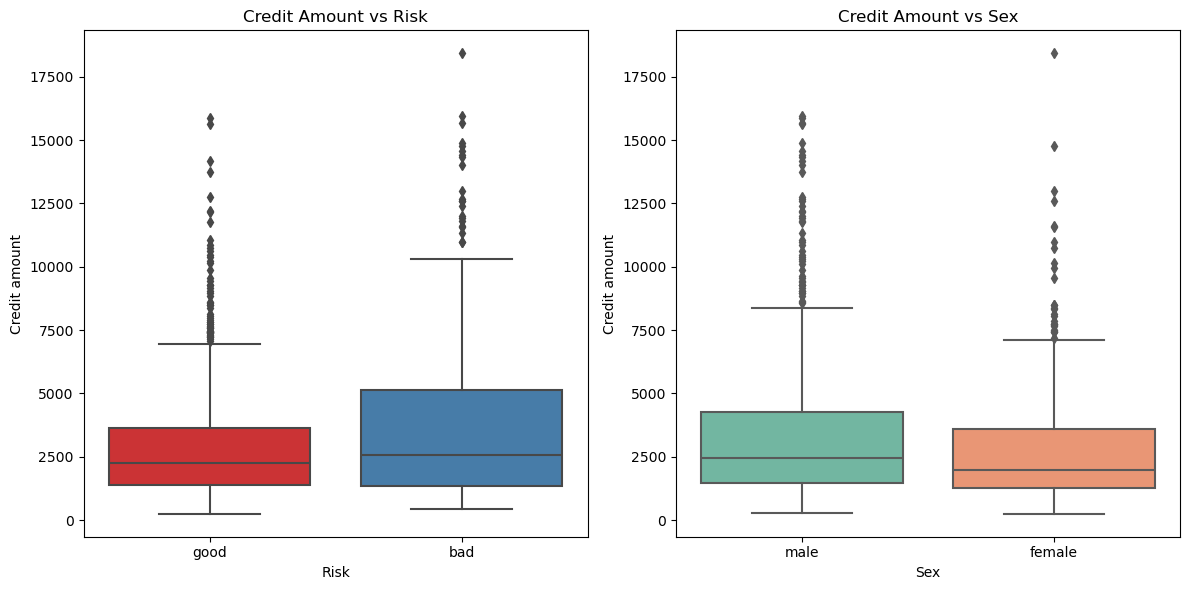

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(ax=axes[0], x='Risk', y='Credit amount', data=df, palette='Set1')
axes[0].set_title("Credit Amount vs Risk")

sns.boxplot(ax=axes[1], x='Sex', y='Credit amount', data=df, palette='Set2')
axes[1].set_title("Credit Amount vs Sex")

plt.tight_layout()
plt.show()


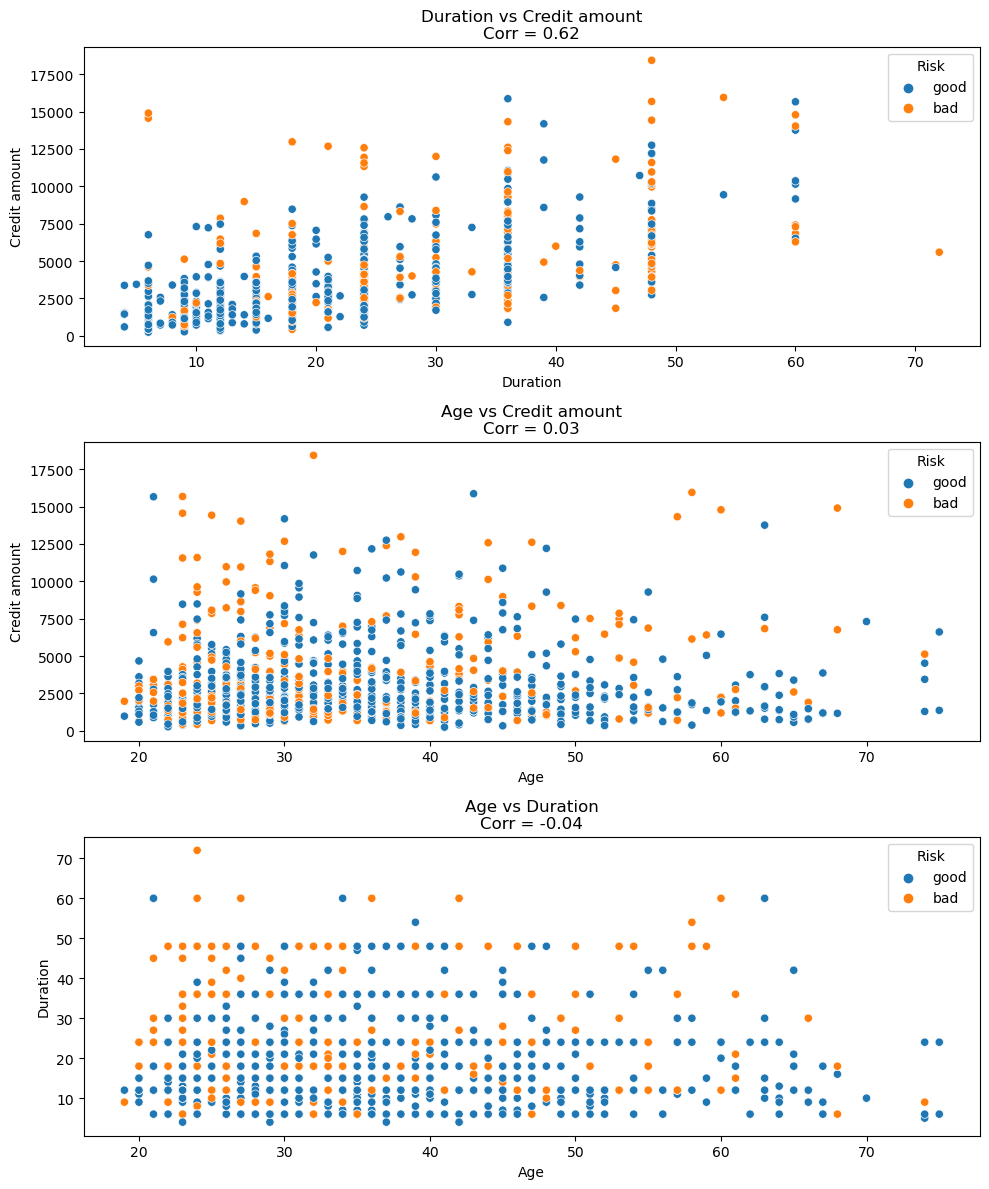

In [10]:


# Creating a 3-row, 1-column subplot layout (vertical)
fig, axes = plt.subplots(3, 1, figsize=(10,12))

#Duration vs Credit amount
sns.scatterplot(ax=axes[0], x='Duration', y='Credit amount', hue='Risk', data=df)
corr1 = df[['Duration', 'Credit amount']].corr().iloc[0,1]
axes[0].set_title(f"Duration vs Credit amount\nCorr = {corr1:.2f}")

# Age vs Credit amount
sns.scatterplot(ax=axes[1], x='Age', y='Credit amount', hue='Risk', data=df)
corr2 = df[['Age', 'Credit amount']].corr().iloc[0,1]
axes[1].set_title(f"Age vs Credit amount\nCorr = {corr2:.2f}")

# Age vs Duration
sns.scatterplot(ax=axes[2], x='Age', y='Duration', hue='Risk', data=df)
corr3 = df[['Duration', 'Age']].corr().iloc[0,1]
axes[2].set_title(f"Age vs Duration\nCorr = {corr3:.2f}")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Total Credit Amount by Purpose')

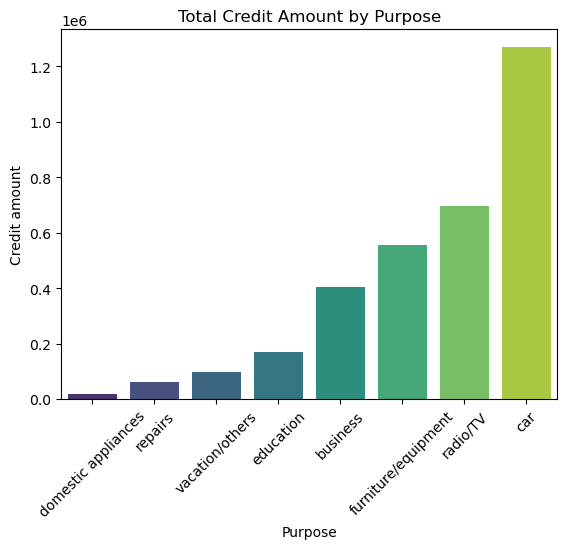

In [11]:
grouped=df.groupby('Purpose')['Credit amount'].sum().reset_index()
grouped=grouped.sort_values(by='Credit amount', ascending=True)
sns.barplot(x='Purpose', y='Credit amount', data=grouped, palette='viridis')
plt.xticks(rotation=45) 
plt.title('Total Credit Amount by Purpose')

In [12]:
# transforming the categorical variables
encoded_values={}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Risk':  # Excluding the target variable
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        encoded_values[col] = encoder

# Logistic Regression Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Risk', axis=1), df['Risk'], test_size=0.25, random_state=42)
#keeping 25% of the data reserved for testing

In [15]:
len(X_train), len(X_test)

(750, 250)

In [16]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

In [18]:
log_reg.score = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {log_reg.score:.2f}")
cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr= classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Model Accuracy: 0.71
Confusion Matrix:
[[  9  63]
 [ 10 168]]
Classification Report:
              precision    recall  f1-score   support

         bad       0.47      0.12      0.20        72
        good       0.73      0.94      0.82       178

    accuracy                           0.71       250
   macro avg       0.60      0.53      0.51       250
weighted avg       0.65      0.71      0.64       250



The model accuracy is deceptively high and it does so by correctly asessing the majority class which is good risk. However, the model does a really bad job at predicting bad risks, f1 score of just 20%. This primarily happens due to the huge class imbalance that's present in the target variale, risk type.

### Class Imbalance Problem

Text(0.5, 1.0, 'Count of Risk Categories')

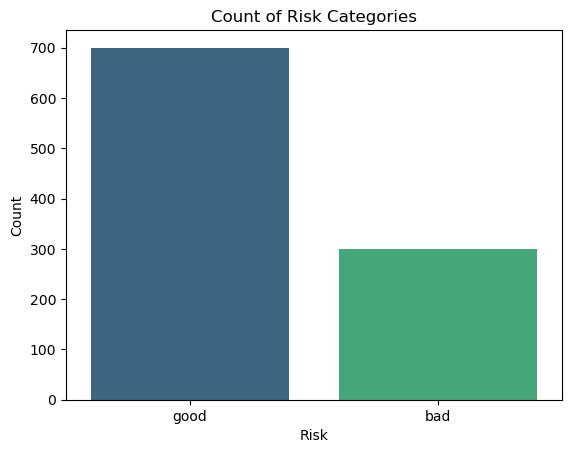

In [19]:
counts=df['Risk'].value_counts().reset_index()
counts.columns= ['Risk', 'Count']
sns.barplot(x='Risk', y='Count', data=counts, palette='viridis')
plt.title('Count of Risk Categories')

### Using SMOTE

In [20]:
from imblearn.over_sampling import SMOTE
X_train_scaled_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)

 SMOTE creates artificial data points for the minority class using KNN algorithm instead of just copying existing ones, which helps the machine learning model learn the patterns of the rare class more effectively.



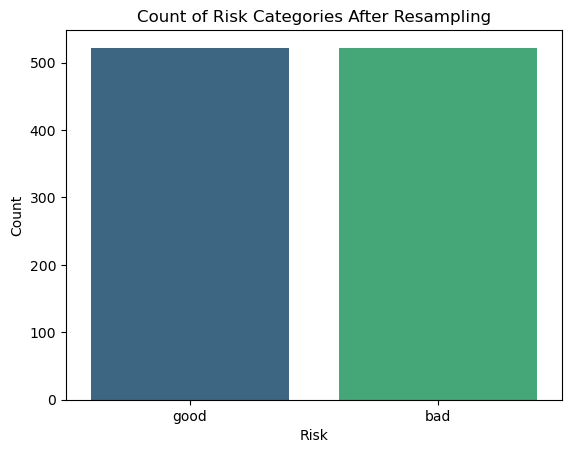

In [21]:
res_counts = pd.Series(y_train_res).value_counts().reset_index()
res_counts.columns = ['Risk', 'Count']
sns.barplot(x='Risk', y='Count', data=res_counts, palette='viridis')
plt.title('Count of Risk Categories After Resampling')
plt.show()

In [22]:
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_scaled_res, y_train_res)
y_pred_smote= log_reg_smote.predict(X_test_scaled)

In [30]:
log_reg_smote.score = accuracy_score(y_test, y_pred_smote)
print(f"Model Accuracy after SMOTE: {log_reg.score:.2f}")
cm= confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix SMOTE:")
print(cm)
cr= classification_report(y_test, y_pred_smote)
print("Classification Report SMOTE:")
print(cr)

Model Accuracy after SMOTE: 0.71
Confusion Matrix SMOTE:
[[ 40  32]
 [ 66 112]]
Classification Report SMOTE:
              precision    recall  f1-score   support

         bad       0.38      0.56      0.45        72
        good       0.78      0.63      0.70       178

    accuracy                           0.61       250
   macro avg       0.58      0.59      0.57       250
weighted avg       0.66      0.61      0.62       250



### Using Class Weight

Introduces higher penalty to mispredicting the minority class as compared tothe majority class

In [32]:
log_reg_weighted = LogisticRegression(class_weight='balanced', random_state=42)
log_reg_weighted.fit(X_train_scaled_res, y_train_res)
log_reg_weighted.fit(X_train_scaled, y_train)
y_pred_weighted =log_reg_weighted.predict(X_test_scaled)
log_reg_weighted.score = accuracy_score(y_test, y_pred_smote)
print(f"Weighted Model Accuracy: {log_reg.score:.2f}")
cm= confusion_matrix(y_test, y_pred_weighted)
print("Confusion Matrix Weighted:")
print(cm)
print("Classification Report Weighted:")
print(classification_report(y_test, y_pred_weighted))

Weighted Model Accuracy: 0.71
Confusion Matrix Weighted:
[[ 42  30]
 [ 67 111]]
Classification Report Weighted:
              precision    recall  f1-score   support

         bad       0.39      0.58      0.46        72
        good       0.79      0.62      0.70       178

    accuracy                           0.61       250
   macro avg       0.59      0.60      0.58       250
weighted avg       0.67      0.61      0.63       250



## Random Forrest Classifier Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

Using Class Weight

In [36]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
rf.score = accuracy_score(y_test, y_pred_rf)
print(f"Weighted Model Accuracy: {log_reg.score:.2f}")
cm= confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix Weighted:")
print(cm)
print("Classification Report Weighted:")
print(classification_report(y_test, y_pred_rf))


Weighted Model Accuracy: 0.71
Confusion Matrix Weighted:
[[ 25  47]
 [ 16 162]]
Classification Report Weighted:
              precision    recall  f1-score   support

         bad       0.61      0.35      0.44        72
        good       0.78      0.91      0.84       178

    accuracy                           0.75       250
   macro avg       0.69      0.63      0.64       250
weighted avg       0.73      0.75      0.72       250



SMOTE

In [38]:
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_scaled_res, y_train_res)
y_pred_rf_smote = rf_smote.predict(X_test_scaled)
print("Accuracy (Random Forest with SMOTE):", accuracy_score(y_test, y_pred_rf_smote))
cm= confusion_matrix(y_test, y_pred_rf_smote)
print("Confusion Matrix SMOTE:")
print(cm)
print(classification_report(y_test, y_pred_rf_smote))

Accuracy (Random Forest with SMOTE): 0.752
Confusion Matrix SMOTE:
[[ 38  34]
 [ 28 150]]
              precision    recall  f1-score   support

         bad       0.58      0.53      0.55        72
        good       0.82      0.84      0.83       178

    accuracy                           0.75       250
   macro avg       0.70      0.69      0.69       250
weighted avg       0.75      0.75      0.75       250



The Random Forrest with SMOTE is the most balanced so far as it does the best job at predicting the good risk while also doing significantly better than other models. The Random Forrest SMOTE model sacrifices precision but significantly does better with recall than the weighted model. 